In [50]:
import os
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [51]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
 csv_path = os.path.join(housing_path, "housing.csv")
 return pd.read_csv(csv_path)

In [52]:
#fetch_housing_data()

In [53]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [54]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [55]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [56]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


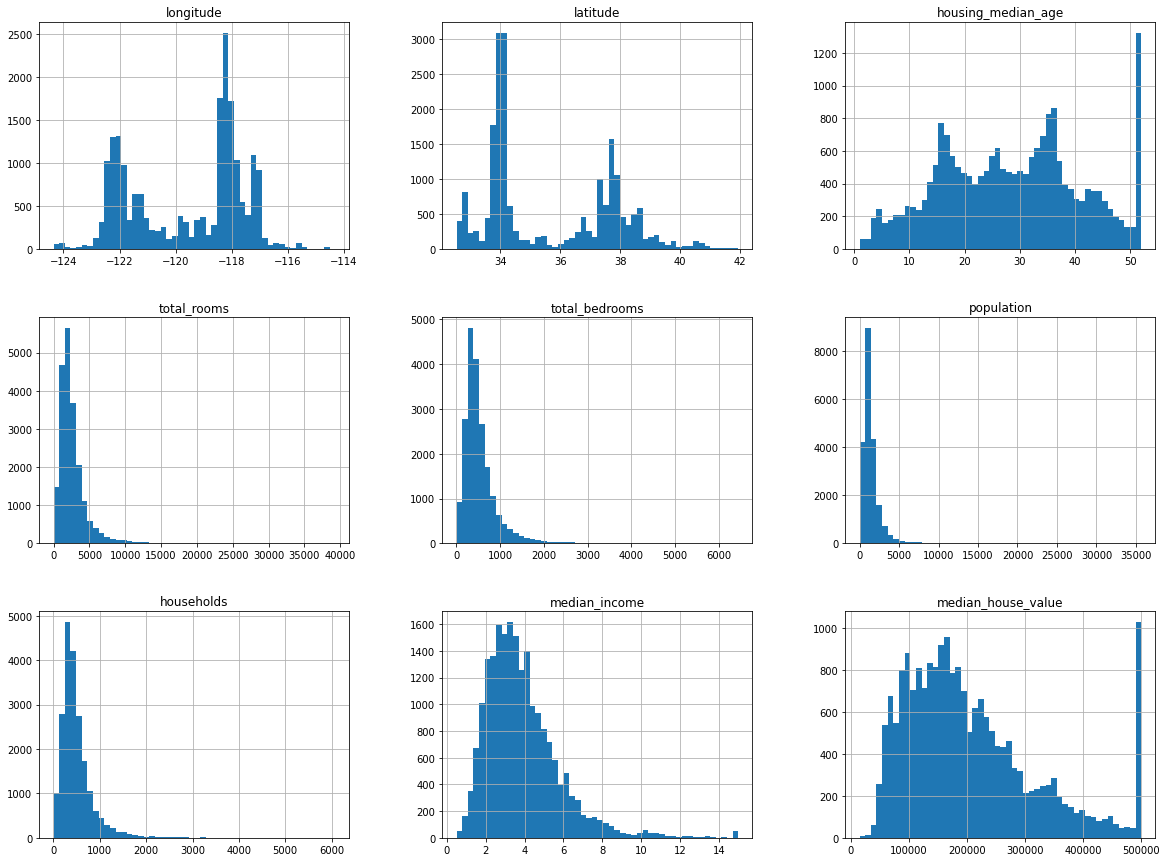

In [57]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [58]:
import numpy as np
def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data)) # tworzenie losowej permutacji liczb od 0 do len(data)
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size] # pierwsze 20% losowych indeksów
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices] # iloc - zwracanie danych spod indeksów zawarych w tablicy train_indicestest_indices/

In [59]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [60]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
 return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
 ids = data[id_column]
 in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio)) # zwraca maskę bitową 
 return data.loc[~in_test_set], data.loc[in_test_set] # negacja maski bitowej dla danych trenujących i zwykła dla testowych

In [61]:
housing_with_id = housing.reset_index() # Dodaje kolumnę `index`
print(housing_with_id.head())
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index") # dzielenie zbioru własną funkcją

   index  longitude  latitude  housing_median_age  total_rooms  \
0      0    -122.23     37.88                41.0        880.0   
1      1    -122.22     37.86                21.0       7099.0   
2      2    -122.24     37.85                52.0       1467.0   
3      3    -122.25     37.85                52.0       1274.0   
4      4    -122.25     37.85                52.0       1627.0   

   total_bedrooms  population  households  median_income  median_house_value  \
0           129.0       322.0       126.0         8.3252            452600.0   
1          1106.0      2401.0      1138.0         8.3014            358500.0   
2           190.0       496.0       177.0         7.2574            352100.0   
3           235.0       558.0       219.0         5.6431            341300.0   
4           280.0       565.0       259.0         3.8462            342200.0   

  ocean_proximity  
0        NEAR BAY  
1        NEAR BAY  
2        NEAR BAY  
3        NEAR BAY  
4        NEAR BAY  


In [62]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) # dzielenie zbioru metodą sklearn

In [63]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<AxesSubplot:>

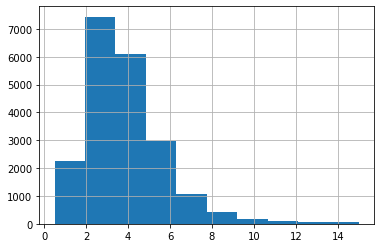

In [64]:
housing["median_income"].hist()

In [65]:
# kategoryzowanie danych do przedziałów
housing["income_cat"] = pd.cut(housing["median_income"], # tablica wejściowa do skategoryzowania
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf], # przedziały
 labels=[1, 2, 3, 4, 5]) # etykiety


In [66]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

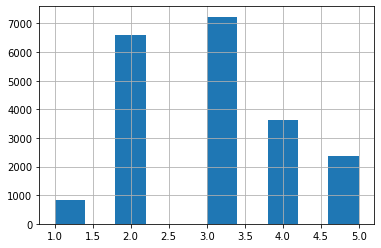

In [67]:
housing["income_cat"].hist()

In [68]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(housing, housing["income_cat"]): # próbkowanie warstwowe na podstawie income_cat, zwraca indeksy zbioru testowego i uczącego
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]

In [69]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set) # proporcje kategorii dochodów w zbiorze testowym

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [70]:
housing["income_cat"].value_counts() / len(housing) # proporcje kategorii dochodów z całym zbiorze - są bliskie tych ze zbioru testowego więc jest dobrze

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [71]:
for set_ in (strat_train_set, strat_test_set): # usuwanie kategorii dochodów ze zbiorów uczącego i testowego
 set_.drop("income_cat", axis=1, inplace=True)

In [72]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

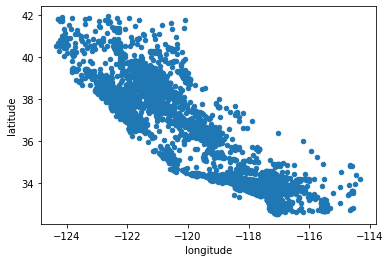

In [73]:
housing.plot(kind="scatter", x="longitude", y="latitude")


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

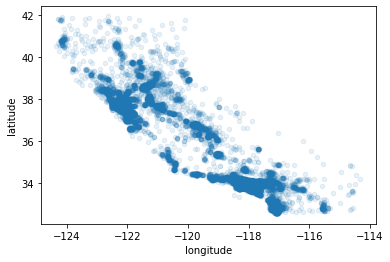

In [74]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

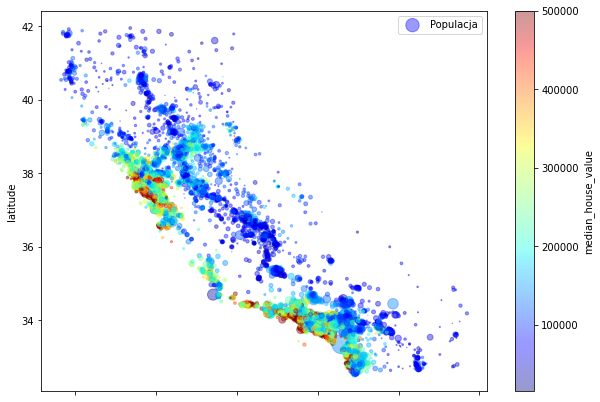

In [75]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="Populacja", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
#s - promień - populacja każdego dystryktu
#c - kolory - ceny mieszkań 

In [76]:
# mierzenie korelacji mediany cen z resztą atrybutów - duża korelacja oznacza, że jeśli wartość jednego atrybutu rośnie
# wartość drugiego też rośnie, ujemna że jeśli jego wartość maleje to drugiego rośnie
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

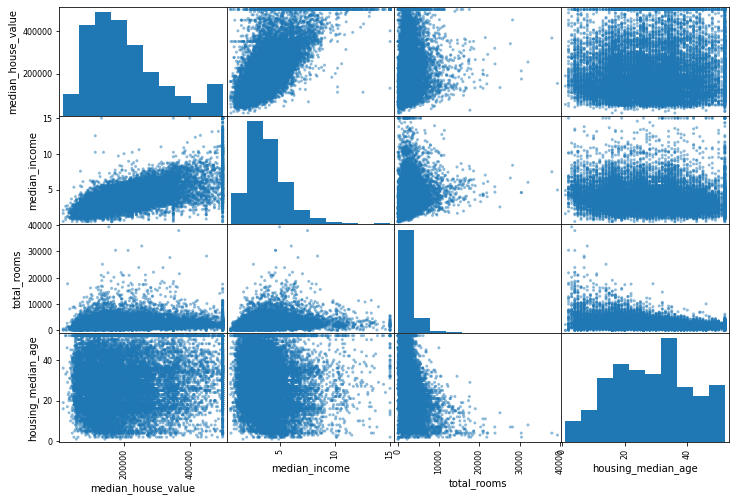

In [77]:
# generowanie wykresu każdego atrybutu numerycznego względem każdego innego atrybutu numerycznego 
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

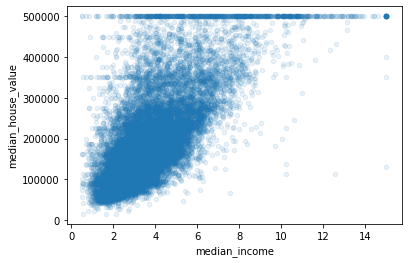

In [78]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [79]:
# tworzenie kombinacji atrybutów w celu znalezienia wzorca
housing["Pokoje_na_rodzinę"] = housing["total_rooms"]/housing["households"]
housing["Sypialnie_na_pokoje"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["Populacja_na_rodzinę"]=housing["population"]/housing["households"]

In [80]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

# ilość sypialni_na_pokoje najbardziej skorelowana po medianie dochodu

median_house_value      1.000000
median_income           0.687151
Pokoje_na_rodzinę       0.146255
total_rooms             0.135140
housing_median_age      0.114146
households              0.064590
total_bedrooms          0.047781
Populacja_na_rodzinę   -0.021991
population             -0.026882
longitude              -0.047466
latitude               -0.142673
Sypialnie_na_pokoje    -0.259952
Name: median_house_value, dtype: float64

# czyszczenie danych

Ze względu na to, że atrybut total_bedrooms ma wybrakowane dane trzeba się tym zająć. Do wyboru są trzy sposoby

1. pozbyć się dystryktów zawierających brakujące dane;
2. pozbyć się całego atrybutu;
3. uzupełnić dane określoną wartością (zero, średnia, mediana itd.).

<i><b>housing.dropna(subset=["total_bedrooms"]) # opcja 1 </br>
housing.drop("total_bedrooms", axis=1) # opcja 2</br>
median = housing["total_bedrooms"].median() # opcja 3</br>
housing["total_bedrooms"].fillna(median, inplace=True)</br></br>
</b></i>
My skorzystamy z SimpleImputer w celu wpisania do zestawu mediany danych w miejsce pustych rekordów

In [81]:
housing = strat_train_set.drop("median_house_value", axis=1) # ponowne kopiowanie danych
housing_labels = strat_train_set["median_house_value"].copy()

In [82]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [83]:
# mediana jest liczona tylko na podstawie wartości numerycznych więc konieczne jest pozbycie się ocean_proximity które jest obiektem
housing_num = housing.drop("ocean_proximity", axis=1)
print(housing.info())
print(housing_num.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 no

In [84]:
imputer.fit(housing_num) # dopasowanie imputera do danych uczących / fit = szacowanie danych

SimpleImputer(strategy='median')

In [85]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [86]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [87]:
X = imputer.transform(housing_num) # zastąpienie brakujących wartości medianami

In [88]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index=housing_num.index) # przekształcenie tablicy przekształceń z powrotem na DataFrame

In [89]:
housing_tr.info() # total_bedrooms uzupełnione medianą

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


# Obsługa tekstu i atrybutów kateogralnych

In [90]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [91]:
#przekształcanie tekstu na wartości numeryczne
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[0:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [92]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [93]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [94]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [95]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Własny transformator

In [96]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin): #dziedziczenie po TransformerMixin pozwala na korzystanie z metody fit_tranform bez implementowania jej
 def __init__(self, add_bedrooms_per_room = True): # Żadnych zmiennych *args ani **kargs
     self.add_bedrooms_per_room = add_bedrooms_per_room
 def fit(self, X, y=None):
     return self # Nie robi nic innego
 def transform(self, X):
     print(type(X))
     Pokoje_na_rodzinę = X[:, rooms_ix] / X[:, households_ix] # kopiowanie całej kolumny rooms_ix / household_ix
     Populacja_na_rodzinę = X[:, population_ix] / X[:, households_ix]
     if self.add_bedrooms_per_room:
         Sypialnie_na_pokoje = X[:, bedrooms_ix] / X[:, rooms_ix]
         return np.c_[X, Pokoje_na_rodzinę, Populacja_na_rodzinę, Sypialnie_na_pokoje]
     else:
         return np.c_[X, Pokoje_na_rodzinę, Populacja_na_rodzinę]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

<class 'numpy.ndarray'>


# Skalowanie cech

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# wywoływane są kolejne funkcje przekształcające (z metodą fit_transform) gdzie atrybutem kolenych jest wynik poprzednich
# wszystkie estymatory oprócz ostatniego muszą być funkcjami przekształcającymi, ostatniemu wystarczy fit()
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

<class 'numpy.ndarray'>


In [98]:
# transformator przetwarzający wszystkie kolumny i dobierający odpowiednie transformacje do poszczególnych typów kolumn
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num) # zapisanie nazw kolumn numerycznych
#print(list(housing_num))
cat_attribs = ["ocean_proximity"] # nazwy kolumn kategoralnych

# konstruktor to lista krotek zawierających (nazwa, transformator, lista nazw/indeksów kolumn wobec których zastosowane zostanie przekształcenie)
# tak samo jak w przypadku potoków nazwa może być dowolna, ale unikalna i bez podwójnych podkreślników
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

<class 'numpy.ndarray'>


# Wybór i uczenie modelu

In [99]:
# tworzenie i uczenie modelu regresji liniowej
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [100]:
some_data = housing.iloc[0:5]
some_labels = housing_labels.iloc[0:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Prognozy: ", lin_reg.predict(some_data_prepared))
print("Etykiety: ", list(some_labels))

<class 'numpy.ndarray'>
Prognozy:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Etykiety:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [101]:
# Mierzenie błędu RMSE
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse
# duży błąd 68k$ gdzie ceny wahają się od 120k do 265k jest nie do zaakceptowania
# należy wybrać inny algorytm, wprowadzić lepsze cechy albo zmniejszyć ograniczenia modelu

68627.87390018745

In [102]:
# algorytm drzew decyzyjnych
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [103]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
# Brak błędu wskazuje na znaczne przetrenowanie modelu

0.0

## Sprawdzian krzyżowy
W celu dokładniejszej oceny modelu należy skorzystać z metody sprawdziianu krzyżowego</br>
<b>k-krotny sprawdzian krzyżowy (kroswalidacja, k-fold cross-validation)</b> - dla k = 10, podział zbioru uczącego na 10 podzbiorów i uczenie go 10 razy, za każdym razem na 9 różnych podzbiorach i testowanie jednym nieużywanym zbiorem. Wynik to tablica zawierająca 10 wyników ewaluacji </br>

<ul>
    <li>Funkcja użyteczności - im większa wartość tym lepsza</li>
    <li>Funkcja kosztu - im mniejsza wartość tym lepsza</li>
</ul>

In [104]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10) #scoring - funkcja użyteczności(im większa wartość tym lepsza)
tree_rmse_scores = np.sqrt(-scores) # przez to że wyżej użyta jest f użyteczności tutaj trzeba dać -score

In [105]:
def display_scores(scores):
    print("Wyniki: ", scores)
    print("Średnia: ", scores.mean())    
    print("Odchylenie standardowe: ", scores.std())    

    
display_scores(tree_rmse_scores)

Wyniki:  [73452.49666873 69899.23132877 68877.67951489 73220.60041448
 68963.46907536 77771.80274791 68824.82386415 73322.81929242
 69083.76615127 71025.29001421]
Średnia:  71444.19790721922
Odchylenie standardowe:  2801.657854037239


In [106]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Wyniki:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Średnia:  69104.07998247063
Odchylenie standardowe:  2880.3282098180675


In [107]:
# model losowego lasu
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [108]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18650.698705770003

In [109]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-lin_scores)
display_scores(forest_rmse_scores)

KeyboardInterrupt: 

Wyniki dla zestawu uczącego są mniejesze niż dla zbioru walidacyjnego co oznaczam że model ulega przetrenowaniu. Aby temu zapobiec można uprościć model, ograniczyć go (np. regularyzacja) lub pozyskać większą liczbę przykładów uczących.

In [63]:
import joblib

joblib.dump(forest_reg, "forest_reg_model.pkl")

['forest_reg_model.pkl']

# Regulowanie modelu

## Metoda przeszukiwania siatki
Podajemy interesujące nas hiperparametry oraz ich proponowane wartości. Wszystkie kombinacje zostaną ocenione za pomocą sprawdzianu krzyżowego. Przydatne gdy mamy niewielką ilość hiperparametrów do sprawdzenia.

In [111]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=3)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END max_features=2, n_estimators=3;, score=(train=-1062098879.896, test=-4057186791.299) total time=   0.0s
[CV 2/5] END max_features=2, n_estimators=3;, score=(train=-1136533194.540, test=-4190532606.502) total time=   0.0s
[CV 3/5] END max_features=2, n_estimators=3;, score=(train=-1185778930.424, test=-4165872386.014) total time=   0.0s
[CV 4/5] END max_features=2, n_estimators=3;, score=(train=-1082098132.819, test=-4007467085.019) total time=   0.0s
[CV 5/5] END max_features=2, n_estimators=3;, score=(train=-1074951901.907, test=-4066691237.392) total time=   0.0s
[CV 1/5] END max_features=2, n_estimators=10;, score=(train=-577088394.979, test=-3094622969.390) total time=   0.1s
[CV 2/5] END max_features=2, n_estimators=10;, score=(train=-579581427.703, test=-2960748823.758) total time=   0.1s
[CV 3/5] END max_features=2, n_estimators=10;, score=(train=-573964922.035, test=-2899059869.927) total time=   0.1s
[CV

[CV 5/5] END bootstrap=False, max_features=2, n_estimators=10;, score=(train=-0.000, test=-3039575689.399) total time=   0.2s
[CV 1/5] END bootstrap=False, max_features=3, n_estimators=3;, score=(train=-0.000, test=-3836943076.910) total time=   0.0s
[CV 2/5] END bootstrap=False, max_features=3, n_estimators=3;, score=(train=-4.206, test=-3413912655.223) total time=   0.0s
[CV 3/5] END bootstrap=False, max_features=3, n_estimators=3;, score=(train=-0.000, test=-3432976563.837) total time=   0.1s
[CV 4/5] END bootstrap=False, max_features=3, n_estimators=3;, score=(train=-0.000, test=-3706358178.501) total time=   0.0s
[CV 5/5] END bootstrap=False, max_features=3, n_estimators=3;, score=(train=-0.000, test=-3567322581.890) total time=   0.0s
[CV 1/5] END bootstrap=False, max_features=3, n_estimators=10;, score=(train=-0.000, test=-2806207828.421) total time=   0.3s
[CV 2/5] END bootstrap=False, max_features=3, n_estimators=10;, score=(train=-0.379, test=-2648239262.638) total time=   0.

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

Powyższy kod sprawdził 12 + 6 kombinacji modelu z różnymi hiperparametrami, korzystamy z 5 krotnego sprawdzianu krzyżowego co daje nam w sumie 90 przebiegów uczenia

In [65]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [66]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [67]:
cvres = grid_search.cv_results_
print(list(cvres))
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_n_estimators', 'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score']
63004.235390249014 {'max_features': 2, 'n_estimators': 3}
55449.113134329826 {'max_features': 2, 'n_estimators': 10}
52713.15888353803 {'max_features': 2, 'n_estimators': 30}
60711.38262989941 {'max_features': 4, 'n_estimators': 3}
52769.893931665174 {'max_features': 4, 'n_estimators': 10}
50310.89523977488 {'max_features': 4, 'n_estimators': 30}
59474.36408027948 {'max_features': 6, 'n_estimators': 3}
52593.94822300906 {'max_features': 6, 'n_estimators': 10}
50179.31022452011 {'max_features': 6, 'n_estimators': 30}
59280.17035958845 {'max_

## Metoda losowego szukania
Nie są sprawdzane wszystkie kombinacje, ale ewaluowana jest określona liczba losowych kombinacji poprzed dobór losowej wartości hiperparametru w każdym przebiegu. Użyteczne gdy jest bardzo duża przestrzeń hiperparametrów.

In [206]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=10, cv=5, scoring='neg_mean_squared_error',random_state=42, verbose=3)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...................max_features=7, n_estimators=180; total time=   9.5s
[CV] END ...................max_features=7, n_estimators=180; total time=   9.5s
[CV] END ...................max_features=7, n_estimators=180; total time=   9.6s
[CV] END ...................max_features=7, n_estimators=180; total time=   9.4s
[CV] END ...................max_features=7, n_estimators=180; total time=   9.0s
[CV] END ....................max_features=5, n_estimators=15; total time=   0.5s
[CV] END ....................max_features=5, n_estimators=15; total time=   0.5s
[CV] END ....................max_features=5, n_estimators=15; total time=   0.5s
[CV] END ....................max_features=5, n_estimators=15; total time=   0.5s
[CV] END ....................max_features=5, n_estimators=15; total time=   0.5s
[CV] END ....................max_features=3, n_estimators=72; total time=   1.8s
[CV] END ....................max_features=3, n_e

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D06E630910>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D06E655EA0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [205]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

AttributeError: 'dict' object has no attribute 'cv_results_'

In [174]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [175]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

## Regresor maszyny wektorów

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR()
svm_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

In [77]:
scores = cross_val_score(svm_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10, verbose=2)
svm_rmse_scores = np.sqrt(-scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  15.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.5s remaining:    0.0s


[CV] END .................................................... total time=  15.9s
[CV] END .................................................... total time=  15.8s
[CV] END .................................................... total time=  16.2s
[CV] END .................................................... total time=  16.0s
[CV] END .................................................... total time=  15.8s
[CV] END .................................................... total time=  15.6s
[CV] END .................................................... total time=  15.0s
[CV] END .................................................... total time=  15.2s
[CV] END .................................................... total time=  15.8s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.6min finished


In [78]:
display_scores(svm_rmse_scores)

Wyniki:  [116729.13778306 120113.99351281 113925.04340616 120399.11878641
 114687.49942071 122785.64737282 119853.79338279 118280.31108193
 120230.82615529 118840.1885232 ]
Średnia:  118584.55594251942
Odchylenie standardowe:  2609.6120823493407


In [82]:
param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   7.9s
[CV] END ..............................C=10.0, kernel=linear; total time=   8.1s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.9s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.8s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.8s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.9s
[CV] END ..............................C=30.0, kernel=linear; total time=   8.2s
[CV] END ..............................C=30.0, kernel=linear; total time=   9.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   8.2s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.7s
[CV] END .............................C=100.0, kernel=linear; total time=   8.0s
[CV] END .............................C=100.0, 

[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  14.6s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  15.6s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  14.6s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  14.6s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  14.9s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  14.7s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  14.4s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  15.0s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  15.5s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  15.2s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  14.5s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  14.4s
[CV] END ...................

[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=  12.7s
[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=  12.8s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  12.8s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  12.9s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  12.9s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  12.8s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  12.8s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  12.7s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  13.1s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  12.9s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  12.7s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  12.9s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [85]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

84649.6069847477 {'C': 10.0, 'kernel': 'linear'}
75457.08962934253 {'C': 30.0, 'kernel': 'linear'}
71635.55362813479 {'C': 100.0, 'kernel': 'linear'}
70677.86808336146 {'C': 300.0, 'kernel': 'linear'}
70396.49756751396 {'C': 1000.0, 'kernel': 'linear'}
70323.59018383716 {'C': 3000.0, 'kernel': 'linear'}
70292.42766659604 {'C': 10000.0, 'kernel': 'linear'}
70286.61835383571 {'C': 30000.0, 'kernel': 'linear'}
118819.34364522224 {'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}
118699.17654811458 {'C': 1.0, 'gamma': 0.03, 'kernel': 'rbf'}
118643.66544284696 {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
118772.67744039097 {'C': 1.0, 'gamma': 0.3, 'kernel': 'rbf'}
118898.89058474178 {'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'}
118933.05253182865 {'C': 1.0, 'gamma': 3.0, 'kernel': 'rbf'}
118601.87638476977 {'C': 3.0, 'gamma': 0.01, 'kernel': 'rbf'}
118270.77280181898 {'C': 3.0, 'gamma': 0.03, 'kernel': 'rbf'}
118092.00656626429 {'C': 3.0, 'gamma': 0.1, 'kernel': 'rbf'}
118460.8070829649 {'C': 3.0, 'gamma'

In [86]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

In [87]:
grid_search.best_estimator_

SVR(C=30000.0, kernel='linear')

## Analiza modeli i ich błędów

In [112]:
feature_importances = grid_search.best_estimator_.feature_importances_ # sprawdzanie ważności atrybutów
feature_importances

array([7.81658436e-02, 7.13944024e-02, 4.25846069e-02, 2.18874036e-02,
       2.02369996e-02, 2.31894657e-02, 2.08240152e-02, 2.89090307e-01,
       4.89911255e-02, 1.02248437e-01, 1.12115838e-01, 1.93533075e-02,
       1.39406740e-01, 7.78543117e-05, 4.51694080e-03, 5.91671192e-03])

In [113]:
extra_attribs = ["Pokoje_na_rodzine", "Populacja_na_rodzine","Sypialnie_na_rodzine"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0]) # wywołanie jednego transformatora z potoku
attributes = num_attribs + extra_attribs + cat_one_hot_attribs # nadanie etykiet atrybutom 
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2890903073822144, 'median_income'),
 (0.13940674025827665, 'INLAND'),
 (0.11211583785983796, 'Sypialnie_na_rodzine'),
 (0.10224843745171172, 'Populacja_na_rodzine'),
 (0.07816584364555675, 'longitude'),
 (0.07139440237190169, 'latitude'),
 (0.048991125471573735, 'Pokoje_na_rodzine'),
 (0.04258460692289402, 'housing_median_age'),
 (0.023189465708583698, 'population'),
 (0.02188740363065664, 'total_rooms'),
 (0.020824015181539125, 'households'),
 (0.020236999554432374, 'total_bedrooms'),
 (0.01935330752658156, '<1H OCEAN'),
 (0.0059167119196726955, 'NEAR OCEAN'),
 (0.0045169408028176376, 'NEAR BAY'),
 (7.785431174940119e-05, 'ISLAND')]

array([7.85247395e-02, 6.33166525e-02, 4.44192856e-02, 1.82182725e-02,
       1.68715752e-02, 1.78897206e-02, 1.65208545e-02, 3.14843132e-01,
       5.31866506e-02, 1.02500119e-01, 9.35017067e-02, 1.46155334e-02,
       1.55820494e-01, 1.64983662e-04, 3.09683982e-03, 6.50943989e-03])

## Ocena za pomocą zbioru testowego
Należy pobrać dane testowe i je przekształcić. (Za pomocą samego transform(), fit() dopasowuje model do danych)

In [114]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1) # kopiowanie z danych testowych wszystkiego oprócz mediany wartości
y_test = strat_test_set["median_house_value"].copy() # kopiowanie mediany wartości - etykieta

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

<class 'numpy.ndarray'>


48724.672148477744

In [91]:
joblib.dump(final_model, "SVR_reg_model.pkl")

['SVR_reg_model.pkl']

In [115]:
# Sprawdzanie jak precyzyjne jest oszacowanie za pomocą 95% przedziału ufności
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(), scale = stats.sem(squared_errors))) 
# wynikiem działania jest tablica zawierająca przedział ufności
# z 95% prawdopodobieństwem możemy stwierdzić, że w podanym przedziale znajduje się szukana wartość

array([46752.31040096, 50620.24124918])

Strojenie hiperparametrów będzie zazwyczaj dawać gorsze wyniki niż zmierzone przez sprawdzian krzyżowy. Jeśli tak by się działo to należy przestać stroić hiperparametry bo to oznacza, że są one zbyt dobrze przystosowane do danych testowych.

,predicted_value,value,percentage_error
0,481977.366667,500001.0,3.739519
1,218616.666667,162500.0,34.533333
2,220530.000000,204600.0,7.785924
3,159486.666667,159700.0,0.133762
4,255540.033333,184000.0,38.880453


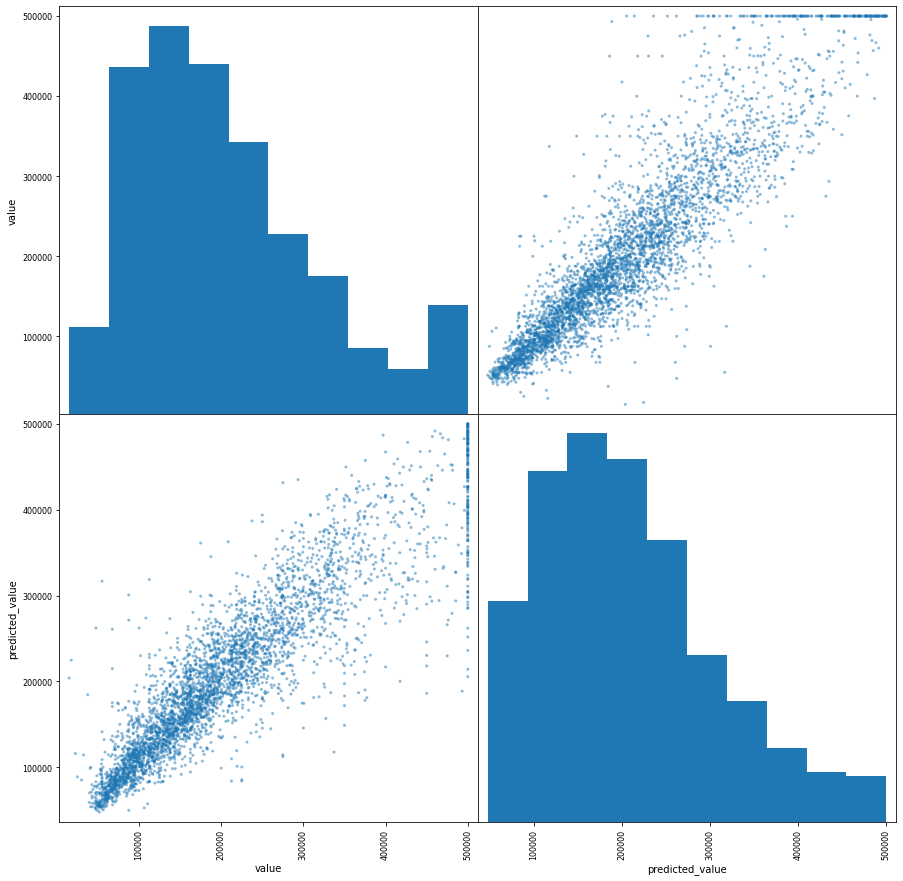

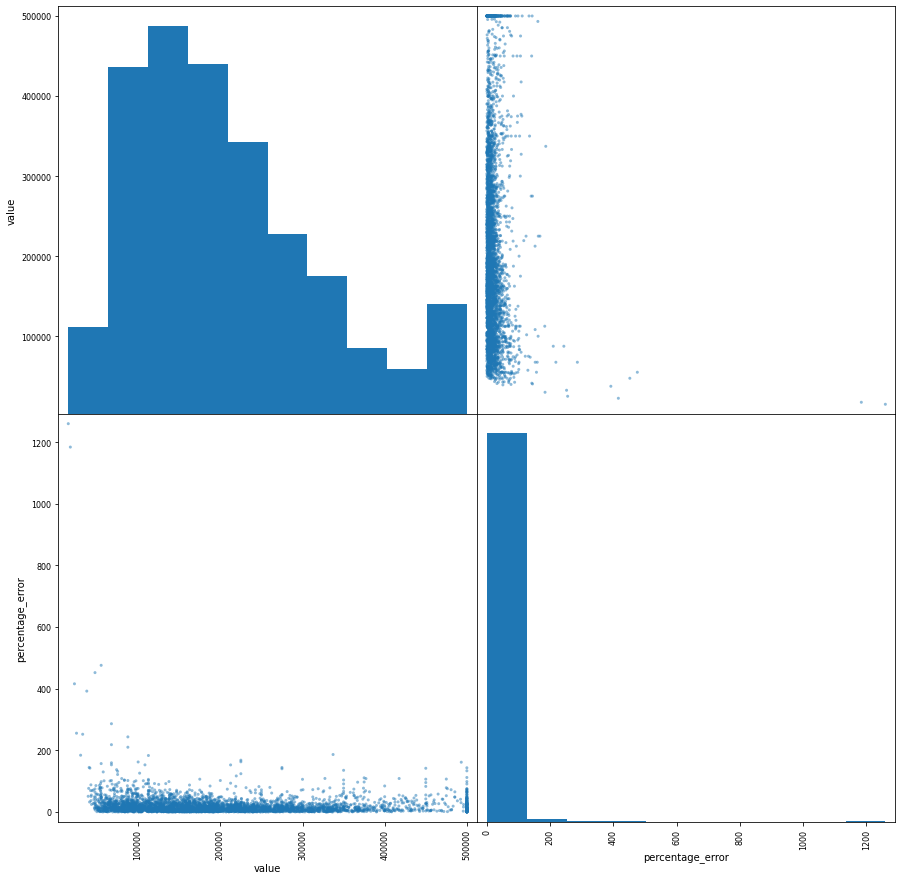

In [116]:
values = y_test.values
percentage_difference = np.where(final_predictions > values,final_predictions * 100 / values, values * 100 / final_predictions) - 100
predicted_differences = pd.DataFrame(np.c_[final_predictions, values,percentage_difference], columns=["predicted_value","value","percentage_error"])
scatter_matrix(predicted_differences[["value","predicted_value"]],figsize=(15, 15))
scatter_matrix(predicted_differences[["value","percentage_error"]],figsize=(15, 15))
predicted_differences.head()



## Moja analiza
Wychodzą dziwne duże procentowo błedy przy predykcji cen, może tak być na skutek zaszumionych danych powyżej 500k

In [94]:
print("Średnia różnicy cen w procentach: ",percentage_difference.mean())
print("Mediana różnicy cen w procentach: ", np.median(percentage_difference))

Średnia różnicy cen w procentach:  26.036449246080604
Mediana różnicy cen w procentach:  21.655251584097037


<AxesSubplot:xlabel='percentage_error', ylabel='value'>

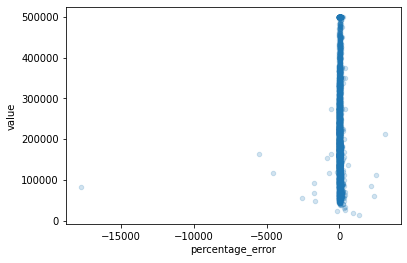

In [95]:
predicted_differences.plot(kind="scatter", y="value", x="percentage_error", alpha=0.2)

## Dobieranie najistotniejszych atrybutów

In [285]:
def indices_of_top_k(arr,k):
        print(np.array(arr))
        print(np.argpartition(np.array(arr),-k)) # tworzenie tablicy w taki sposób, że na pozycji k znajduje się element 
        # taki jaki znalazłby się w posortowanej tablicy, przed nim są elementy mniejsze, za nim większe
        return np.sort(np.argpartition(np.array(arr),-k)[-k:]) # zwracanie 5 osatnich indeksów tablicy

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]
    
        

In [161]:
k = 5
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

[7.85247395e-02 6.33166525e-02 4.44192856e-02 1.82182725e-02
 1.68715752e-02 1.78897206e-02 1.65208545e-02 3.14843132e-01
 5.31866506e-02 1.02500119e-01 9.35017067e-02 1.46155334e-02
 1.55820494e-01 1.64983662e-04 3.09683982e-03 6.50943989e-03]
[11 15  2  3  4  5  6  1  8 14 13  0 12 10  9  7]


array([ 0,  7,  9, 10, 12], dtype=int64)

In [162]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'Populacja_na_rodzine',
       'Sypialnie_na_rodzine', 'INLAND'], dtype='<U20')

In [163]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.3148431317703484, 'median_income'),
 (0.15582049425874417, 'INLAND'),
 (0.10250011939829723, 'Populacja_na_rodzine'),
 (0.09350170670671361, 'Sypialnie_na_rodzine'),
 (0.0785247395280103, 'longitude')]

In [164]:
preparation_and_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('selection', TopFeatureSelector(feature_importances,k))
])

In [165]:
housing_prepared_top_k_features = preparation_and_selection_pipeline.fit_transform(housing)

<class 'numpy.ndarray'>
[7.85247395e-02 6.33166525e-02 4.44192856e-02 1.82182725e-02
 1.68715752e-02 1.78897206e-02 1.65208545e-02 3.14843132e-01
 5.31866506e-02 1.02500119e-01 9.35017067e-02 1.46155334e-02
 1.55820494e-01 1.64983662e-04 3.09683982e-03 6.50943989e-03]
[11 15  2  3  4  5  6  1  8 14 13  0 12 10  9  7]


In [166]:
housing_prepared_top_k_features[0:3] # sprawdzanie pierwszych 3 indeksów top 5 atrybutów 

array([[-0.94135046, -0.8936472 ,  0.00622264, -0.12112176,  1.        ],
       [ 1.17178212,  1.292168  , -0.04081077, -0.81086696,  0.        ],
       [ 0.26758118, -0.52543365, -0.07537122, -0.33827252,  1.        ]])

In [169]:
housing_prepared[0:3, top_k_feature_indices] # sprawdzanie czy powyższa tablica na pewno się zgadza ze stanem faktycznym

array([[-0.94135046, -0.8936472 ,  0.00622264, -0.12112176,  1.        ],
       [ 1.17178212,  1.292168  , -0.04081077, -0.81086696,  0.        ],
       [ 0.26758118, -0.52543365, -0.07537122, -0.33827252,  1.        ]])

## Pojedynczy potok do wszystkiego

In [327]:
rnd_searchh = {'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}
rnd_searchh2 = {'max_features': 8, 'n_estimators': 3}

In [315]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=2, cv=3, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.9s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   6.0s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.9s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  14.2s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  14.5s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  14.6s


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=2,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D0D24ABC10>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D0D25E8910>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [328]:
full_data_preparation_and_prediction_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_searchh2)) # z jakiegoś powodu nie da się przesłać kwargs do RandomForestRegressor więc SVR musi być
])

In [329]:
full_data_preparation_and_prediction_pipeline.fit(housing, housing_labels)

<class 'numpy.ndarray'>
[7.85247395e-02 6.33166525e-02 4.44192856e-02 1.82182725e-02
 1.68715752e-02 1.78897206e-02 1.65208545e-02 3.14843132e-01
 5.31866506e-02 1.02500119e-01 9.35017067e-02 1.46155334e-02
 1.55820494e-01 1.64983662e-04 3.09683982e-03 6.50943989e-03]
[11 15  2  3  4  5  6  1  8 14 13  0 12 10  9  7]


ValueError: max_features must be in (0, n_features]

In [319]:
def funk(**kwargs):
    print("Liczba przekazanych parametrów:",len(kwargs))
    
    for key, item in kwargs.items():
        print ("Klucz:", key, "Wartość:", item)



In [320]:
funk(**rnd_search.best_params_)

Liczba przekazanych parametrów: 3
Klucz: C Wartość: 26290.206464300216
Klucz: gamma Wartość: 0.9084469696321253
Klucz: kernel Wartość: rbf


In [321]:
rnd_search.best_params_

{'C': 26290.206464300216, 'gamma': 0.9084469696321253, 'kernel': 'rbf'}

In [117]:
# sprawdzanie potoku na kilku przykładach
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", full_data_preparation_and_prediction_pipeline.predict(some_data))
print("Labels\t",list(some_labels))

NameError: name 'full_data_preparation_and_prediction_pipeline' is not defined

# Ćwiczenia

## cw1

In [118]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel':['linear', 'rbf'], 'C':[10.,1000.], 'gamma':['auto','scale',0.01,0.3]}
]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ..................C=10.0, gamma=auto, kernel=linear; total time=   7.3s
[CV] END ..................C=10.0, gamma=auto, kernel=linear; total time=   7.4s
[CV] END ..................C=10.0, gamma=auto, kernel=linear; total time=   7.0s
[CV] END ..................C=10.0, gamma=auto, kernel=linear; total time=   7.0s
[CV] END ..................C=10.0, gamma=auto, kernel=linear; total time=   6.9s
[CV] END .....................C=10.0, gamma=auto, kernel=rbf; total time=  13.1s
[CV] END .....................C=10.0, gamma=auto, kernel=rbf; total time=  13.2s
[CV] END .....................C=10.0, gamma=auto, kernel=rbf; total time=  13.6s
[CV] END .....................C=10.0, gamma=auto, kernel=rbf; total time=  13.3s
[CV] END .....................C=10.0, gamma=auto, kernel=rbf; total time=  12.9s
[CV] END .................C=10.0, gamma=scale, kernel=linear; total time=   6.9s
[CV] END .................C=10.0, gamma=scale, k

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 1000.0],
                          'gamma': ['auto', 'scale', 0.01, 0.3],
                          'kernel': ['linear', 'rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [121]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70396.49756751396

In [ ]:
grid_search.best_params_

## cw2

In [127]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_distribs = {
    'kernel':['linear','rbf'],
    'C':reciprocal(20,20000),
    'gamma':expon(scale=1.0),
}
svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs, n_iter=6,cv=5, scoring='neg_mean_squared_error',verbose=2,random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   7.1s
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   6.9s
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   6.7s
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   7.1s
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   6.9s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=  13.9s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=  12.4s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=  12.1s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=  12.7s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=  13.7s
[CV] END C=58.750769152656574, gamma=0.059838768608680676, k

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=6,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000284D8D90D90>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000284DA9C2110>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [129]:
neg_mse = rnd_search.best_score_
rmse = np.sqrt(-neg_mse)
rmse

70727.86865468492

In [131]:
rnd_search.best_params_

{'C': 265.8583788632432, 'gamma': 3.010121430917521, 'kernel': 'linear'}

### Dystrybucja wykładnicza

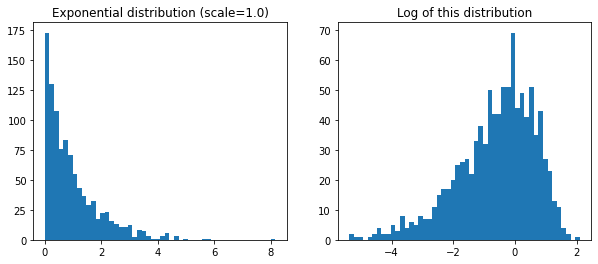

In [132]:
expon_distrib = expon(scale=1.0)
samples = expon_distrib.rvs(1000, random_state=42)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

### dystrybucja reciprocal

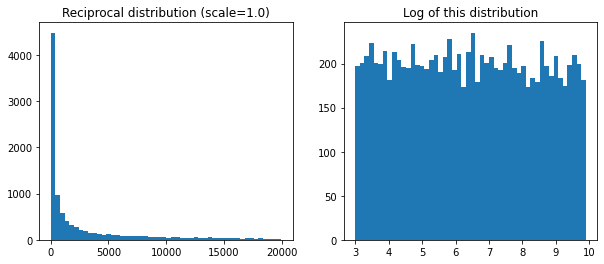

In [133]:
reciprocal_distrib = reciprocal(20,20000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

In [147]:
samples = reciprocal_distrib.rvs(10000, random_state=42)

with np.printoptions(threshold=np.inf):
    print(np.sort(np.log(samples)))
    
low_v = (samples<1000).sum()
low_v

[2.99581264 2.99594447 2.99609719 2.9966627  2.9973006  2.99739618
 2.99739707 2.99741041 2.99850604 2.99856645 2.99986269 3.00024574
 3.00068416 3.00118602 3.00198956 3.00224916 3.00341435 3.00460477
 3.00508279 3.00559892 3.00591308 3.00654364 3.00949346 3.01194805
 3.01391456 3.01659971 3.01729588 3.01796325 3.02098918 3.02142678
 3.02211936 3.02219098 3.02279945 3.02465811 3.02584719 3.02587267
 3.02772915 3.02985645 3.03044722 3.03069646 3.03185716 3.03243646
 3.03251048 3.03268178 3.03376499 3.03387771 3.034632   3.03551169
 3.03559459 3.03624438 3.03750377 3.03844861 3.03979714 3.03984431
 3.04038648 3.04262332 3.04324355 3.04375589 3.04396403 3.04472078
 3.04475338 3.04652531 3.04655836 3.04728582 3.04797476 3.04867354
 3.04990006 3.05174171 3.0532044  3.05344453 3.05350654 3.05411314
 3.05441765 3.05527023 3.05695768 3.05816781 3.05827621 3.05850329
 3.05858028 3.05904565 3.05926326 3.05928982 3.0595709  3.05964643
 3.06004548 3.06019282 3.06028493 3.06162503 3.06273995 3.0632

5764

## cw3

In [198]:
from sklearn.base import BaseEstimator, TransformerMixin

def top_k_indices(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
        
    def fit(self,X,y=None):
        self.feature_indices_ = top_k_indices(self.feature_importances, self.k)
        return self
    
    def transform(self, X):
        return X[:, self.feature_indices_]

In [199]:
k = 5

In [204]:
top_k_feature_indices = top_k_indices(feature_importances, k)
top_k_feature_indices

array([ 0,  7,  9, 10, 12], dtype=int64)

In [205]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'Populacja_na_rodzine',
       'Sypialnie_na_rodzine', 'INLAND'], dtype='<U20')

In [206]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.2890903073822144, 'median_income'),
 (0.13940674025827665, 'INLAND'),
 (0.11211583785983796, 'Sypialnie_na_rodzine'),
 (0.10224843745171172, 'Populacja_na_rodzine'),
 (0.07816584364555675, 'longitude')]

In [200]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ("feature_selection", TopFeatureSelector(feature_importances, k)) # feature_importances musi być wcześniej policzone w jakiś sposób
])

In [201]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

<class 'numpy.ndarray'>


In [207]:
housing_prepared_top_k_features[0:3]

array([[-0.94135046, -0.8936472 ,  0.00622264, -0.12112176,  1.        ],
       [ 1.17178212,  1.292168  , -0.04081077, -0.81086696,  0.        ],
       [ 0.26758118, -0.52543365, -0.07537122, -0.33827252,  1.        ]])

In [208]:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.94135046, -0.8936472 ,  0.00622264, -0.12112176,  1.        ],
       [ 1.17178212,  1.292168  , -0.04081077, -0.81086696,  0.        ],
       [ 0.26758118, -0.52543365, -0.07537122, -0.33827252,  1.        ]])

## cw4

In [210]:
prep_select_predict_pipeline = Pipeline([
    ('prep_select', preparation_and_feature_selection_pipeline),
    ("svm_reg", SVR(**rnd_search.best_params_))
])

In [211]:
prep_select_predict_pipeline.fit(housing, housing_labels)

<class 'numpy.ndarray'>


Pipeline(steps=[('prep_select',
                 Pipeline(steps=[('preparation',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('attribs_adder',
                                                                                    CombinedAttributesAdder()),
                                                                                   ('std_scaler',
                                                                                    StandardScaler())]),
                                                                   ['longitude',
                                                                    'latitude',
                                                      

In [213]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prep_select_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

<class 'numpy.ndarray'>
Predictions:	 [ 81843.50383747 295359.62657784 100837.97589154 150105.23912038]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0]


In [222]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [224]:
full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'

In [227]:
full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'

param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   5.4s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   6.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   6.5s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   6.1s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   6.5s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   5.7s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   6.1s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   6.4s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   6.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   6.1s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   5.2s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   6.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   6.8s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   5.9s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   6.0s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   5.0s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   6.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   5.7s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   5.9s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   6.1s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   5.4s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   5.9s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   6.0s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   5.7s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   6.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   5.6s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   6.4s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   6.4s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   6.3s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   5.8s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   5.4s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   5.8s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   5.9s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   6.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   5.8s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   4.9s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   6.6s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   6.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   5.8s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   5.9s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   5.7s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   6.4s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   6.3s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   6.5s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   6.6s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   5.5s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   6.0s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   6.0s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   5.8s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   5.9s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   5.1s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   5.8s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   5.7s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   5.7s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   5.9s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   5.1s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   6.6s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   6.6s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   6.9s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   6.6s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   5.8s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   6.6s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   6.3s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   6.3s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   6.7s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   6.1s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   6.6s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   6.8s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   6.6s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   6.4s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   5.8s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   6.8s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   6.3s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   6.4s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   6.8s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   5.6s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   6.4s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   5.9s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   6.1s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   6.3s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   5.4s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   6.3s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   6.3s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   6.1s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   6.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   5.5s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   6.6s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   6.3s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   6.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   6.7s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   5.5s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   6.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   6.3s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   6.1s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   6.4s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   5.7s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   6.4s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   6.8s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   6.8s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   6.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   5.6s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   6.6s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   6.3s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   6.1s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   6.0s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   5.5s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   6.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   6.1s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   6.7s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   6.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   5.5s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   6.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   6.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   6.8s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   7.0s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   5.7s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   6.7s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   6.7s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   6.9s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   6.3s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=   5.6s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=   7.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=   6.7s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=   7.0s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=   6.6s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=   5.8s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=   7.0s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=   6.6s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=   6.4s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=   6.8s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=   5.3s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=   6.1s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=   6.1s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=   6.3s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=   6.4s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=   5.7s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=   6.3s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=   6.5s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=   7.1s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=   7.1s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=   6.4s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=   9.0s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=   7.3s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=   7.0s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=   6.7s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=   6.4s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=   6.8s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=   6.9s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=   6.6s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=   6.9s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=   5.6s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=   8.5s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=   7.8s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=   8.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=   7.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=   7.2s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=   7.1s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=   7.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=   7.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=   6.8s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=   5.7s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=   6.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=   6.5s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=   6.8s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=   7.1s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=   6.2s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=   7.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=   7.7s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=   6.8s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=   6.4s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=   5.7s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=   6.3s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=   6.5s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=   6.4s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=   7.0s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=   6.1s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=   6.9s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=   6.8s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=   6.6s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=   6.6s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=   7.2s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=   7.9s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=   7.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=   6.8s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=   6.8s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=   5.8s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=   6.9s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=   7.0s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=   6.9s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=   7.2s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=   6.1s
<class 'numpy.ndarray'>


D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *a

<class 'numpy.ndarray'>
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=   7.1s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=   7.1s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=   6.9s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=   7.6s
<class 'numpy.ndarray'>
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=   0.0s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=   7.5s
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=   7.7s
<class 'num

D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\Python\machine_learning\env\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
       

In [228]:
grid_search_prep.best_params_

{'feature_selection__k': 1, 'preparation__num__imputer__strategy': 'mean'}